# Random Forest model
Here I used nonparametric random forest with a tfidf vectorizer, and the full dataframe of art and hip hop, post and title columns both, so all the words I could use.  At the beginning, street art has the target '1', and later I will switch the target to hip hop to see how the important words shift, and if it will expose any interesting or relevant characteristics about the model or the data.

In [4]:
import pandas as pd

In [5]:
#import two variables so I can flip the target later
hhdf = df = pd.read_csv('../data/dfs/full_df_csv')

In [6]:
df.shape

(3527, 6)

In [7]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,post,title,subreddit,words
0,0,0,NaN,Brexcellent!,1,Brexcellent!
1,1,1,NaN,Graffiti - LIDE - Yellow Letters,1,Graffiti - LIDE - Yellow Letters


In [8]:
df.tail(2)

,Unnamed: 0,Unnamed: 0.1,post,title,subreddit,words
3525,3525,1788,NaN,OliveGreen - Wasabi (Official Music Video),0,OliveGreen - Wasabi (Official Music Video)
3526,3526,1789,NaN,Nitembezee - Gabiro Mtu Necessary Ft. Kidis,0,Nitembezee - Gabiro Mtu Necessary Ft. Kidis


In [9]:
#okay it's there.  Try random forest.
df['subreddit'].value_counts(normalize =True)

1    0.568472
0    0.431528
Name: subreddit, dtype: float64

In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [11]:
#split
X = df['words']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify =y)

## TfIDF only

In [123]:
# coming back to remove more stop words
from sklearn.feature_extraction import stop_words
wordlist =list(stop_words.ENGLISH_STOP_WORDS)
wordlist += ['https', 'www', 'x200b', 've', 'll', 'jpg', 'gt', '20', '18', 'com', 'st']

In [140]:
#Since it is one column of words, I'll do a tfidf first
tif =TfidfVectorizer(stop_words =wordlist, max_features =1000)

X_train_tif = tif.fit_transform(X_train)
X_test_tif = tif.transform(X_test)

In [141]:
X_train_tif_df = pd.DataFrame(X_train_tif.todense(),
                   columns=tif.get_feature_names())

X_train_tif_df.head()

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
#So this is the most frequent tfidf words for BOTH subreddits with all the words
freq = pd.DataFrame(X_train_tif_df.mean())
#freq.columns =['word_freq']

#with art as 1 and hhop as 0 and ['words'] column, although this is combo of all the words.
plot =freq.nlargest(n=30, columns= 0)
plot

,0
fresh,0.050207
art,0.037605
street,0.037013
amp,0.028537
ft,0.020459
video,0.019371
mural,0.014932
feat,0.014693
lil,0.013933
graffiti,0.013533


In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

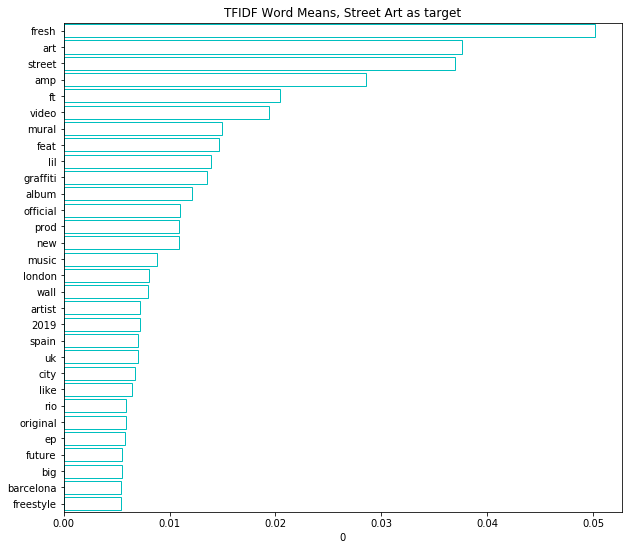

In [194]:
fig, ax = plt.subplots(figsize=(10,9))
sns.barplot(x=plot[0], y=plot.index, orient="h", color="w", edgecolor ='c')
ax.set_title('TFIDF Word Means, Street Art as target');

## Random Forest

In [145]:
#changed max depth to 100, scores are still in the 90s, and I'll try it on a new subreddit.
art_rf =RandomForestClassifier(n_estimators=10, max_depth =100)

cross_val_score(art_rf, X_train_tif, y_train).mean()

/Users/alannabesaw/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.918344103465253

In [146]:
art_rf.fit(X_train_tif, y_train)
print(art_rf.score(X_train_tif, y_train))
art_rf.score(X_test_tif, y_test)

0.951984877126654


0.9183673469387755

Scoring to 1 as street art, this is good accuracy, and the baseline was around 55%.

## feature importance from forest with art as 1

In [147]:
#art as 1 feature importance from the forest
art_fimp = pd.DataFrame(art_rf.feature_importances_,
                   index=tif_hh.get_feature_names())

In [148]:
art_fimp.head()

,0
000,0.000009
01,0.000232
03,0.001420
04,0.000000
10,0.000000


In [149]:
art_fimp.columns =['R.Forest feature imp.']

In [187]:
#strength of predictors or NOT for hip hop through the random forest with tfidf
a_fimp =art_fimp.sort_values('R.Forest feature imp.', ascending =False)[:30]#[-30:]
a_fimp

,R.Forest feature imp.
french,0.162018
ft,0.066331
feel,0.039364
art,0.037343
praise,0.030038
life,0.026843
angeles,0.026653
alive,0.025040
ny,0.021980
vol,0.016765


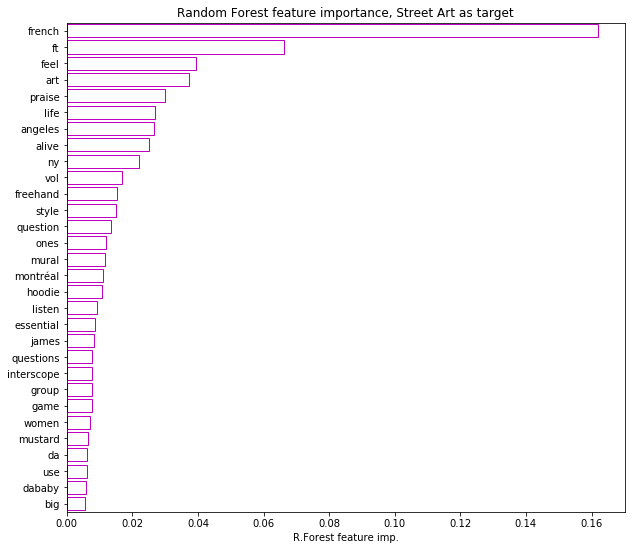

In [250]:
#feature importance from rf tfidf art as target
fig, ax = plt.subplots(figsize=(10,9))
sns.barplot(x=a_fimp['R.Forest feature imp.'], y=a_fimp.index, orient="h", color="w", edgecolor ='m')
ax.set_title('Random Forest feature importance, Street Art as target');

## confusion matrix

In [159]:
#art_rf_preds = art_rf.predict(X_test_tif)
#rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(y_test, art_rf_preds).ravel()
#print('Rand F Accuracy =', ((rf_tn+rf_tp)/(rf_fn+rf_fp+rf_tn+rf_tp)))

In [41]:
from sklearn.metrics import confusion_matrix
#with my preds from ['words], rand forest and tfidf
art_cm =confusion_matrix(y_test, art_rf_preds)

In [42]:
#that's a pretty good accuracy...
art_cm_rf_df =pd.DataFrame(art_cm, columns =['pred neg', 'pred pos'],
            index =['actual neg', 'actual pos'])
art_cm_rf_df

,pred neg,pred pos
actual neg,311,70
actual pos,6,495


# Evaluation from Random Forest model with TFIDF
## Full df art as 1
### Type I error: 
-False positives, here positives are street art, there are 70 type I errors, 70 times the model misclassifies 0(hip hop) as 1(street art).  So this is bad for if I want to see art but see hip hop, 70 hip hop posts exist in the street art subreffit.

### Type II error:
-False negatives, here positives are still street art, there are only 6 type II errors, 6 times the model misclassifies 1(street art) as 0(hip hop), so 6  street art posts exist in hip hop.

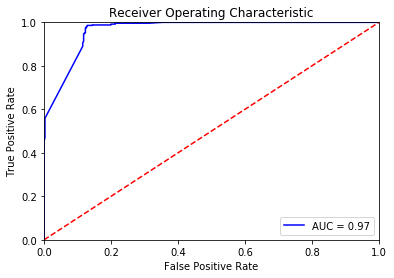

In [43]:
model =art_rf

from sklearn.metrics import roc_curve, auc
#auc_roc
probs = model.predict_proba(X_test_tif)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)  #this is the relevant line
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Try RF model with hhop as one intead of art
Make hip hop the target so I can see what the actual feature importance is relative to hip hop instead of assuming 'not_art' is the same thing.

In [44]:
#map 1 for art and 0 for music
hhdf['subreddit'] =hhdf['subreddit'].map({0: 1, 1: 0})
hhdf.head(2)

,Unnamed: 0,Unnamed: 0.1,post,title,subreddit,words
0,0,0,NaN,Brexcellent!,0,Brexcellent!
1,1,1,NaN,Graffiti - LIDE - Yellow Letters,0,Graffiti - LIDE - Yellow Letters


In [45]:
hhdf.tail(2)

,Unnamed: 0,Unnamed: 0.1,post,title,subreddit,words
3525,3525,1788,NaN,OliveGreen - Wasabi (Official Music Video),1,OliveGreen - Wasabi (Official Music Video)
3526,3526,1789,NaN,Nitembezee - Gabiro Mtu Necessary Ft. Kidis,1,Nitembezee - Gabiro Mtu Necessary Ft. Kidis


In [46]:
#right, hhop as 43% baseline.
hhdf['subreddit'].value_counts(normalize =True)

0    0.568472
1    0.431528
Name: subreddit, dtype: float64

## TFIDF hhop as 1

In [47]:
#tfidf it and try the rf model.
#split
XHH = hhdf['words']
yhh = hhdf['subreddit']

XHH_train, XHH_test, yhh_train, yhh_test = train_test_split(XHH, yhh, random_state =42, stratify =y)

In [160]:
tif_hh =TfidfVectorizer(stop_words =wordlist, max_features =1000)

XHH_train_tif = tif_hh.fit_transform(XHH_train)
XHH_test_tif = tif_hh.transform(XHH_test)

In [161]:
XHH_train_tif_df = pd.DataFrame(XHH_train_tif.todense(),
                   columns=tif_hh.get_feature_names())

XHH_train_tif_df.head(2)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
# It's the same!!!  of course.
#most frequent tfidf words for BOTH subreddits with all the words, hip hop as the target now
hh_freq = pd.DataFrame(XHH_train_tif_df.mean())
#freq.columns =['word_freq']

hh_plot =hh_freq.nlargest(n=25, columns= 0)
hh_plot

,0
fresh,0.053504
art,0.040169
street,0.039358
amp,0.028138
ft,0.020262
video,0.020110
feat,0.016624
mural,0.015414
lil,0.013355
graffiti,0.011887


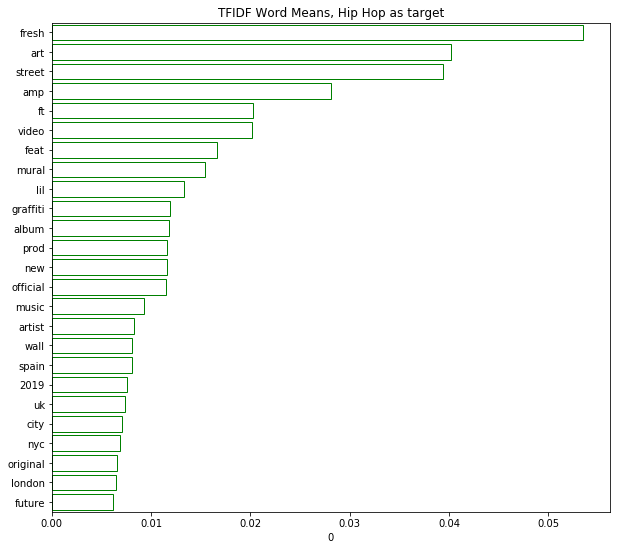

In [251]:
fig, ax = plt.subplots(figsize=(10,9))
sns.barplot(x=hh_plot[0], y=hh_plot.index, orient="h", color="w", edgecolor ='g')
ax.set_title('TFIDF Word Means, Hip Hop as target');

# RF on hhop as 1
Same parameters, trimming back the depth to 100 decreased the performance slightly, but I think that means it isn't too deep.

In [164]:
#changed max depth to 100, scores are still in the 90s, and I'll try it on a new subreddit.
hh_rf =RandomForestClassifier(n_estimators=10, max_depth =100)

cross_val_score(hh_rf, XHH_train_tif, yhh_train).mean()

/Users/alannabesaw/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9077432256577236

In [165]:
#accuracy score
hh_rf.fit(XHH_train_tif, yhh_train)
print(hh_rf.score(XHH_train_tif, yhh_train))
hh_rf.score(XHH_test_tif, yhh_test)

0.9497164461247637


0.9149659863945578

In [166]:
#put this IN A DATAFRAME these are indicator predictors of both categories.  separators
hh_rf.feature_importances_.shape

(1000,)

In [167]:
HH1_fimp = pd.DataFrame(hh_rf.feature_importances_,
                   index=tif_hh.get_feature_names())

In [168]:
HH1_fimp.head()

,0
000,0.000000
01,0.001062
03,0.001449
04,0.000000
10,0.000000


In [169]:
HH1_fimp.columns =['R.Forest feature imp.']

In [170]:
#strength of predictors or NOT for hip hop through the random forest with tfidf
fimp =HH1_fimp.sort_values('R.Forest feature imp.', ascending =False)[:30]#[-30:]
fimp

,R.Forest feature imp.
fresh,0.148415
ft,0.054471
street,0.041974
feat,0.039318
amp,0.035347
art,0.032087
video,0.029566
album,0.023864
official,0.021166
lil,0.020869


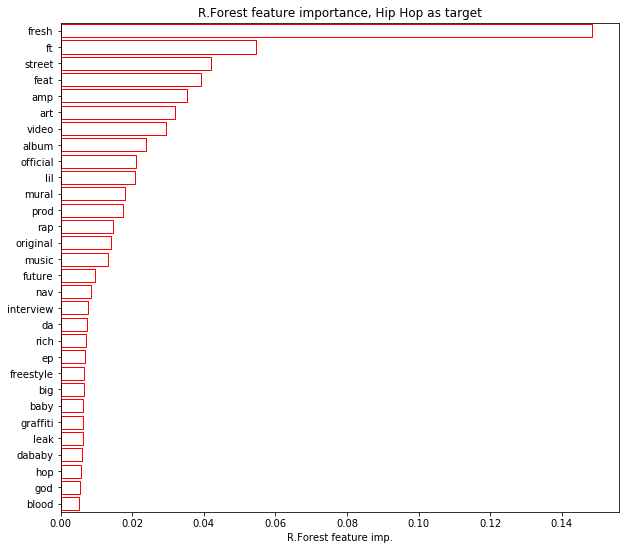

In [252]:
#feature importance from rf tfidf hiphop as target
fig, ax = plt.subplots(figsize=(10,9))
sns.barplot(x=fimp['R.Forest feature imp.'], y=fimp.index, orient="h", color="w", edgecolor ='r')
ax.set_title('R.Forest feature importance, Hip Hop as target');

# An Idea: Pass through the model completely different things.
I wanted to do completely different things and thought it wise to start with other subreddits so there is some unity in the project.  In notebook 5 I go a little further and make it interactive, and that idea began here where I thought I should stick with the format of subreddit.  It was fun and I realized once the frame of work flow is there it is manageable to get creative.
## test flashlight
Posts about flashlights...

In [198]:
#all I need is the words column
flash =pd.read_csv("../data/scrapes/flash_csv")

In [199]:
flash['words'].head(2)

0    #Welcome to the 50K giveaway!!! \n\nAnd here I...
1    \nWelcome to the monthly r/flashlight Buy, Sel...
Name: words, dtype: object

In [200]:
#no need to split, just tfidf it and put it. in the model
#tif_flash =TfidfVectorizer(stop_words ='english', max_features =1000)

#flashTFIDF = tif_flash.fit_transform(flash['words'])

In [201]:
#flash_df = pd.DataFrame(flashTFIDF.todense(),
#                   columns=tif_flash.get_feature_names())

#flash_df.head(2)

In [202]:
#NO, here I need to put the flashlight word column into the hip hop word frame.
flashlight_tif = tif_hh.transform(flash['words'])

In [203]:
flashlight_tif

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7585 stored elements in Compressed Sparse Row format>

In [204]:
#and put that into a df
flashlight_df = pd.DataFrame(flashlight_tif.todense(),
                   columns=tif_hh.get_feature_names())

flashlight_df.head(2)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.030879,0.066833,0.0,0.0,0.031695,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
#these appear often for what that's worth.
#So these are the predictive hip hop words that classift flashlight posts as hip hop
flashlight_df.sum(axis =0).sort_values(ascending = False).head(30)

looking     49.911203
just        48.711130
like        45.246074
need        36.471397
use         35.475450
good        33.623823
new         32.785176
help        30.422383
got         29.883164
amp         29.276316
want        28.744555
work        25.610787
high        25.316167
know        23.799738
don         21.810262
really      19.761020
right       19.392225
time        18.692944
guys        18.488798
better      17.760339
imgur       17.320116
going       16.502009
does        16.467314
power       16.230949
question    15.683144
long        15.256552
used        14.666188
night       14.585754
think       14.408549
white       13.978437
dtype: float64

In [206]:
#score the flashlight tfidf df through the hip hop random forest
#hh_rf.score(flash_df)
#hhf_pred
#can't score.  never mind.

In [207]:
#pred =gs.predict(test[features])
hhf_pred =hh_rf.predict(flashlight_df)

In [210]:
#16.7% of flashlights were categorized as hip hop.
hhf_pred.sum() / len(hhf_pred)
#compare the flashlight predictions to the 

0.167

In [211]:
hhf_pred.mean()
#flashlight posts have more in common with art

0.167

# Poetry through the forest.
Read in the poetry csv and run it through the random forest trained on street art/ hip hop to see which one it is closer to.  My guess is art, but rap does stand for rhythm and poetry...

In [28]:
poetry =pd.read_csv("../data/scrapes/poetry_csv")

In [212]:
poetry['words'].head(2)

0    #Important Moderator Announcement!\n\nThinking...
1    After every war\nsomeone has to clean up.\nThi...
Name: words, dtype: object

In [213]:
# put the poetry word column through the art/hip hop word tfidf.
poetry_tif = tif_hh.transform(poetry['words'])

In [214]:
#and put it into a df
poetry_df = pd.DataFrame(poetry_tif.todense(),
                   columns=tif_hh.get_feature_names())
poetry_df.head(2)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
#these appear often, that's all.
#So these are the predictive art/hiphop words that classify poetry posts as art/h-hop
poetry_df.sum(axis =0).sort_values(ascending = False).head(30)

help       46.712418
like       39.969251
read       23.027937
know       22.471439
amp        22.111243
love       21.535841
just       17.931004
looking    16.056742
want       15.897180
time       15.624809
day        14.922877
life       13.475405
think      12.820498
really     12.320277
people     12.075590
come       11.897432
don        11.252292
heart      11.222476
good       10.886095
little     10.629938
way        10.091905
say         9.758209
away        9.713224
work        9.590376
need        9.566094
old         9.193334
death       8.907039
things      8.765148
night       8.695425
let         8.641659
dtype: float64

In [216]:
#predictions
poetry_pred =hh_rf.predict(poetry_df)

In [217]:
#so poetry is also 25% 'in common' with hip hop, 75% art.  # should add 'x200b, https, and www' to stopwords
poetry_pred.mean()

0.21616161616161617

# robo-people
Posts about people pretending to be robots pretending to be people.

In [223]:
#import robotpeople
robot =pd.read_csv("../data/scrapes/robot_csv")

In [224]:
robot['words'].head(2)

0    [STICKY] WELCOME TO TOTALLYNOTROBOTS. SUBREDDI...
1    #GREETINGS FELLOW HUMANS!\n\n----\n\nTHE MODER...
Name: words, dtype: object

In [225]:
# put the robot word column through the art/hip hop word tfidf.
robot_tif = tif_hh.transform(robot['words'])

In [226]:
#and put it into a df
robot_df = pd.DataFrame(robot_tif.todense(),
                   columns=tif_hh.get_feature_names())
robot_df.head(2)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
#these appear often, predictive art/hiphop words that classify robot posts as art/h-hop
robot_df.sum(axis =0).sort_values(ascending = False).head(30)

human        190.653842
look          26.075785
just          25.812782
yes           21.176540
like          19.559996
enjoy         18.618514
love          16.885597
day           15.066640
friend        12.705932
new           12.274839
beautiful     12.191137
today         11.892803
trying        10.867544
hello          9.407906
child          9.375060
good           8.742062
make           8.396178
cat            8.004534
real           7.989772
help           7.668209
friends        7.387731
feel           7.377940
favorite       6.408652
run            6.292348
think          6.252172
nice           5.944195
need           5.846248
want           5.700346
oh             5.652525
work           5.328826
dtype: float64

In [228]:
#predictions
robot_pred =hh_rf.predict(robot_df)

In [229]:
#so robot is only 8% 'in common' with hip hop, 92% art.  neat.  And street art, kind of is this.
robot_pred.mean()

0.06197478991596639

# cooking
Cooking posts.  

In [30]:
cook =pd.read_csv('../data/scrapes/cooking_csv')

In [230]:
cook['words'].head(2)

0    It was buy one flat for $3, get two free. They...
1    [Here are some of my recent creations!](https:...
Name: words, dtype: object

In [231]:
# put the cook word column through the art/hip hop word tfidf.
cook_tif = tif_hh.transform(cook['words'])

In [232]:
#and put it into a df
cook_df = pd.DataFrame(cook_tif.todense(),
                   columns=tif_hh.get_feature_names())
cook_df.head(2)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
#these appear often, predictive art/hiphop words that classify cooking posts as art/h-hop
cook_df.sum(axis =0).sort_values(ascending = False).head(30)

make       76.373365
just       62.523888
like       54.977891
use        49.101204
good       43.784088
want       39.216996
making     30.964857
don        30.269757
know       30.143621
really     30.099571
time       26.718570
ideas      25.622766
used       25.403799
need       24.383131
does       24.240835
way        23.950207
using      22.972264
help       22.637485
looking    21.876405
water      21.108921
best       19.788200
things     19.426814
got        17.914251
little     17.868127
amp        16.618871
think      16.504117
work       16.455396
going      16.313386
love       15.905466
try        15.358939
dtype: float64

In [234]:
#predictions
cook_pred =hh_rf.predict(cook_df)

In [235]:
#so robot is only 30% 'in common' with hip hop, 70% art.  neat.  And street art, kind of is this.
cook_pred.mean()

0.25930851063829785

# politics
Kind of didn't care but hoped it would be categorized as hip hop.

In [31]:
pols =pd.read_csv("../data/scrapes/pollies_csv")

In [236]:
pols['words'].head(2)

0    Life in the D.C. tech policy world is an adven...
1    The Democratic chairman of the U.S. House Ways...
Name: words, dtype: object

In [237]:
# put the cook word column through the art/hip hop word tfidf.
pols_tif = tif_hh.transform(pols['words'])

In [238]:
#and put it into a df
pols_df = pd.DataFrame(pols_tif.todense(),
                   columns=tif_hh.get_feature_names())
pols_df.head(1)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
#these appear often, predi ctive art/hiphop words that classify politics posts as art/h-hop
pols_df.sum(axis =0).sort_values(ascending = False).head(30)

house           68.608971
says            47.748133
white           26.209041
new             23.452836
care            21.943109
rico            17.736421
north           14.234797
presidential    13.963777
release         12.636020
mexico          12.586100
news            11.568155
people          11.337555
just            10.935617
chicago         10.871608
change          10.740242
make            10.350087
say              9.793172
women            9.650169
anti             9.009546
america          9.002052
joe              8.918470
texas            8.614845
russia           8.425746
won              7.976834
father           7.662060
day              7.418653
said             7.054220
germany          7.046964
born             7.046535
general          6.684697
dtype: float64

In [240]:
#predictions
pol_pred =hh_rf.predict(pols_df)

In [241]:
#so politics is only 8% in common with hip hop, 92% art.  neat.  And street art, kind of is this.
pol_pred.mean()

0.07119741100323625

# space in the forest
All about space.

In [65]:
#import space...
space =pd.read_csv("../data/scrapes/space_csv")

In [242]:
space['words'].head(2)

0    The Democratic chairman of the U.S. House Ways...
1    Hi. That's all I have time to answer today. Th...
Name: words, dtype: object

In [243]:
# put the cook word column through the art/hip hop word tfidf.
space_tif = tif_hh.transform(space['words'])

In [244]:
#and put it into a df
space_df = pd.DataFrame(space_tif.todense(),
                   columns=tif_hh.get_feature_names())
space_df.head(1)

,000,01,03,04,10,100,10th,11,12,13,...,yes,yesterday,ynw,yo,york,young,youtu,youtube,yung,zealand
0,0.0,0.0,0.140786,0.48464,0.0,0.032674,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
#these appear often, predictive art/hiphop words that classify politics posts as art/h-hop
space_df.sum(axis =0).sort_values(ascending = False).head(30)

house       69.108160
says        45.280196
new         27.639192
mexico      17.872502
white       16.742738
release     16.306730
just        15.690709
say         14.508278
women       13.463606
care        13.390261
change      12.599515
people      10.974563
news        10.746558
violence    10.025788
make         9.970371
end          9.918125
said         9.176215
school       8.995578
joe          8.910073
cause        8.534072
power        8.492117
general      8.442397
wall         7.841786
texas        7.731935
want         7.566732
time         7.374440
north        7.175563
michael      7.167246
chicago      7.166795
rico         7.098982
dtype: float64

In [246]:
#predictions
space_pred =hh_rf.predict(space_df)

In [247]:
#7.5% would be categorized as hip hop
space_pred.mean()

0.07543103448275862

# Evaluation
The random forest model works well, and all I really needed to do was make it a little shallower, 10 trees was good from the beginning.  Comporable to Multinomial Naive Bayes

Of all the extra categories, cooking posts are categorized the most like hip hop, and people as robots as people are the most like street art.  More topic modeling, putting the wild subreddits through the forest modeled on hip hop as the target.  "How does the vocabulary dictate the target?" is an interesting question.

I like how some of the word counts can actually make sentences from the lists of sorted values from the wild posts through the hip hop forest. More to less likely to be categorized as hip hop: cooking, poetry (again, the p in rap stands for poetry), flashlights, space, politics, and robots.